In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/luis/Desktop/neovantas/Exam_music_streaming_app.csv',sep=';')

In [3]:
df.shape

(4999, 12)

In [4]:
df.head()

,User_id,Active_days,Songs_per_day,Music_genres_per_day,Numer_devices,Proportion_working_time,Searches_per_day,Proportion_popular_songs,NORTHAMERICA,EU,ASIA,Premium_upgrade
0,1,267,28,3,5,0.000000,0,0.02807482,1,0,0,0
1,2,242,30,4,2,0.000000,0,0.024687337,1,0,0,0
2,3,265,27,3,3,0.567737,8,0.015515292,1,0,0,1
3,4,88,10,1,1,0.000000,2,0.017255847,0,0,1,0
4,5,225,62,5,3,0.000000,20,0.000565837,0,0,1,1


In [5]:
df.dtypes # there are some corrupted data in column "Proportion_popular_songs"

User_id                       int64
Active_days                   int64
Songs_per_day                 int64
Music_genres_per_day          int64
Numer_devices                 int64
Proportion_working_time     float64
Searches_per_day              int64
Proportion_popular_songs     object
NORTHAMERICA                  int64
EU                            int64
ASIA                          int64
Premium_upgrade               int64
dtype: object

In [6]:
df['Proportion_popular_songs'] = pd.to_numeric(df.Proportion_popular_songs,errors='coerce')
df = df.dropna()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

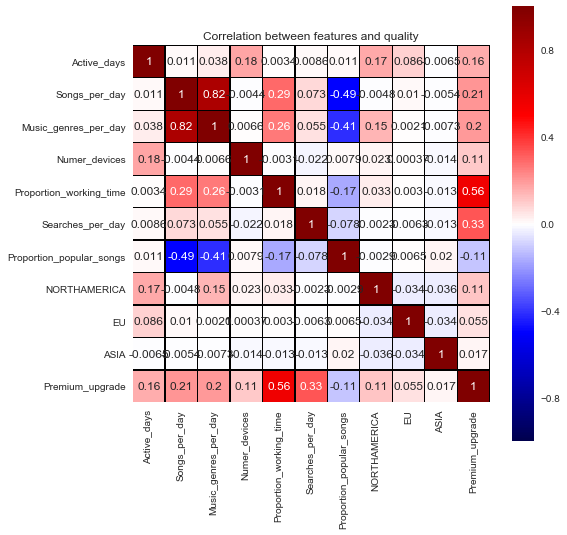

In [8]:
# correlation matrix in a nice visualization
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Correlation between features and quality')
# Draw the heatmap using seaborn
sns.heatmap(df.drop('User_id',axis=1).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="seismic", linecolor='black', annot=True)
plt.show()

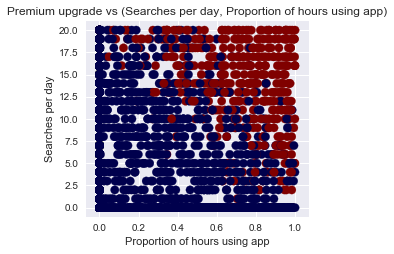

In [9]:
plt.figure(figsize=(4,3.6))
plt.scatter(df["Proportion_working_time"],df["Searches_per_day"],c=df["Premium_upgrade"],s=70,alpha=1.0,cmap= "seismic")
plt.xlabel('Proportion of hours using app')
plt.ylabel('Searches per day')
plt.title('Premium upgrade vs (Searches per day, Proportion of hours using app)')
plt.show()

In [10]:
df[df.Premium_upgrade == 1].Proportion_working_time.mean()

0.615913986481752

In [11]:
df[df.Premium_upgrade == 0].Proportion_working_time.mean()

0.10379954939463612

In [12]:
#Create a new categorical variable that groups the clients by the level of use of the app

In [13]:
df.head()

,User_id,Active_days,Songs_per_day,Music_genres_per_day,Numer_devices,Proportion_working_time,Searches_per_day,Proportion_popular_songs,NORTHAMERICA,EU,ASIA,Premium_upgrade
0,1,267,28,3,5,0.000000,0,0.028075,1,0,0,0
1,2,242,30,4,2,0.000000,0,0.024687,1,0,0,0
2,3,265,27,3,3,0.567737,8,0.015515,1,0,0,1
3,4,88,10,1,1,0.000000,2,0.017256,0,0,1,0
4,5,225,62,5,3,0.000000,20,0.000566,0,0,1,1


(array([  37.,  125.,  345.,  572.,  776.,  677.,  479.,  470.,  359.,
         243.,  255.,  187.,  142.,  110.,   89.,   57.,   42.,   11.,
           6.,    3.]),
 array([   2. ,    7.7,   13.4,   19.1,   24.8,   30.5,   36.2,   41.9,
          47.6,   53.3,   59. ,   64.7,   70.4,   76.1,   81.8,   87.5,
          93.2,   98.9,  104.6,  110.3,  116. ]),
 <a list of 20 Patch objects>)

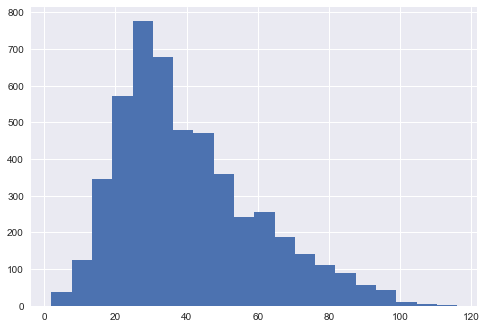

In [14]:
plt.hist(df.Songs_per_day,bins=20)

(array([ 324.,  336.,  382.,  392.,  384.,  358.,  368.,  356.,  341.,
         354.,  372.,  370.,  382.,  176.,   16.,   28.,   14.,   19.,
           8.,    5.]),
 array([   0. ,   17.9,   35.8,   53.7,   71.6,   89.5,  107.4,  125.3,
         143.2,  161.1,  179. ,  196.9,  214.8,  232.7,  250.6,  268.5,
         286.4,  304.3,  322.2,  340.1,  358. ]),
 <a list of 20 Patch objects>)

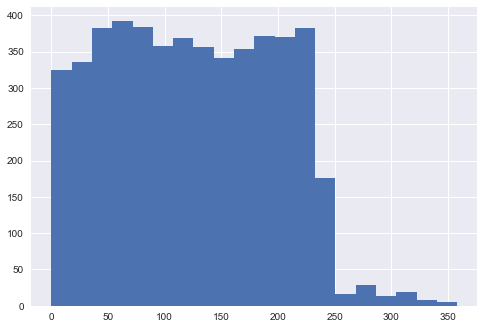

In [15]:
plt.hist(df.Active_days,bins=20)

(array([ 3554.,   172.,   130.,   172.,   148.,   173.,   143.,   175.,
          149.,   169.]),
 array([ 0.        ,  0.09990364,  0.19980728,  0.29971092,  0.39961456,
         0.4995182 ,  0.59942184,  0.69932548,  0.79922912,  0.89913276,
         0.9990364 ]),
 <a list of 10 Patch objects>)

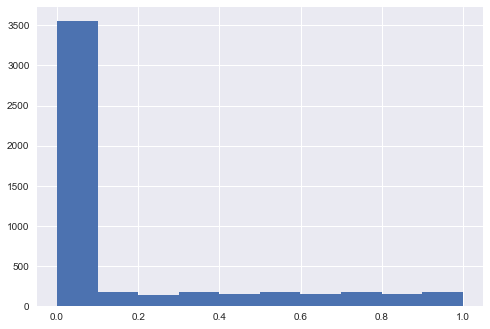

In [16]:
plt.hist(df.Proportion_working_time,bins=10)

(array([ 1190.,   183.,   169.,   170.,   199.,   208.,   190.,   194.,
          183.,   204.,   192.,   194.,   192.,   199.,   206.,   169.,
          180.,   177.,   205.,   381.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <a list of 20 Patch objects>)

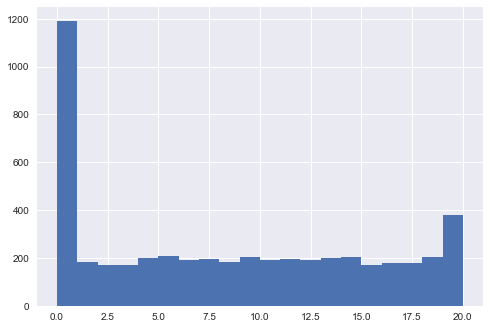

In [17]:
plt.hist(df.Searches_per_day,bins=20)

In [18]:
def categorize_use(searches_per_day,working_time):
    if searches_per_day > df.Searches_per_day.mean() + 0.5*df.Searches_per_day.std() and working_time > df.Proportion_working_time.mean()+0.5*df.Proportion_working_time.std(): 
        return "high"
    if searches_per_day < df.Searches_per_day.mean() - 0.5*df.Searches_per_day.std() and working_time < df.Proportion_working_time.mean()-0.5*df.Proportion_working_time.std():
        return "low"
    else:
        return "medium"

In [19]:
import numpy as np

In [20]:
df['level_of_use'] = np.vectorize(categorize_use)(df['Searches_per_day'], df['Proportion_working_time'])

In [21]:
df.level_of_use.value_counts()

medium    3257
low       1320
high       408
Name: level_of_use, dtype: int64

In [22]:
df.groupby('level_of_use').Searches_per_day.mean()

level_of_use
high      15.960784
low        0.962879
medium     9.902057
Name: Searches_per_day, dtype: float64

In [23]:
df.groupby('level_of_use').Proportion_working_time.mean()

level_of_use
high      0.657974
low       0.000056
medium    0.162589
Name: Proportion_working_time, dtype: float64

In [24]:
df.groupby('level_of_use').Songs_per_day.mean()

level_of_use
high      51.835784
low       35.646212
medium    40.915566
Name: Songs_per_day, dtype: float64

In [25]:
df.head()

,User_id,Active_days,Songs_per_day,Music_genres_per_day,Numer_devices,Proportion_working_time,Searches_per_day,Proportion_popular_songs,NORTHAMERICA,EU,ASIA,Premium_upgrade,level_of_use
0,1,267,28,3,5,0.000000,0,0.028075,1,0,0,0,low
1,2,242,30,4,2,0.000000,0,0.024687,1,0,0,0,low
2,3,265,27,3,3,0.567737,8,0.015515,1,0,0,1,medium
3,4,88,10,1,1,0.000000,2,0.017256,0,0,1,0,low
4,5,225,62,5,3,0.000000,20,0.000566,0,0,1,1,medium


# First we will perform models (clustering and classification) using only the two variables most highly correlated with premium upgrade ('Proportion_working_time' and 'Searches_per_day')

In [26]:
# kmeans clustering 

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [28]:
X = df[['Proportion_working_time','Searches_per_day']]

In [29]:
kmeans.fit(np.array(X))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
array_centroids = kmeans.cluster_centers_

In [31]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use("ggplot")

In [32]:
# we write a function that returns the average distance of data points to their cluster centroid.
# this distance will be our metric of to check the number of appropriate clusters
def kmeans_metric(df):
    distances = []
    for i in range(len(np.array(df))):
        point = np.array(df)[i] # each data point
        cluster = kmeans.predict(np.array(df)[i].reshape(1,-1))[0] # cluster to which "point" belongs
        dist_square = np.dot(array_centroids[cluster]-np.array(df)[i],array_centroids[cluster]-np.array(df)[i])
        dist = np.sqrt(dist_square) #distance of each point to its cluster centroid
        distances.append(dist)    
    return np.mean(distances)

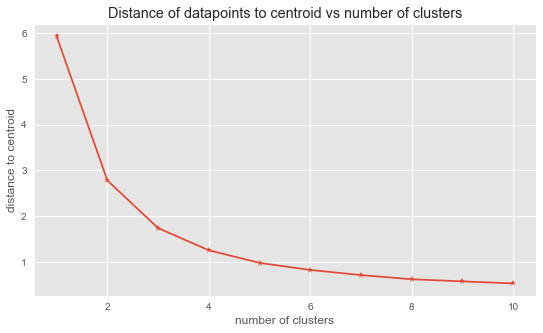

In [33]:
# we now calculate our metric for estimating the most appropriate number of clusters
dists=[]
for k in range(1,11): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np.array(X))
    array_centroids = kmeans.cluster_centers_
    dist_to_centroid = kmeans_metric(X)
    dists.append(dist_to_centroid)
    
plt.figure(figsize=(9,5))
plt.plot(range(1,11), dists, '-*')
plt.xlabel("number of clusters")
plt.ylabel("distance to centroid")
plt.title("Distance of datapoints to centroid vs number of clusters")
plt.show()

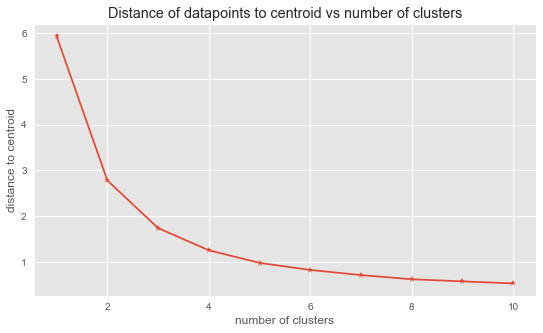

In [34]:
plt.figure(figsize=(9,5))
plt.plot(range(1,11), dists, '-*')
plt.xlabel("number of clusters")
plt.ylabel("distance to centroid")
plt.title("Distance of datapoints to centroid vs number of clusters")
plt.show()

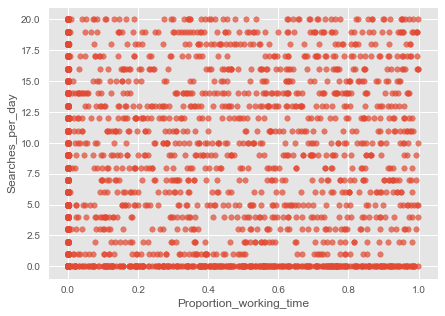

In [35]:
f, ax = plt.subplots(figsize=(7,5))
plt.scatter( X['Proportion_working_time'],X['Searches_per_day'],s=30,alpha=0.7)
plt.xlabel("Proportion_working_time")
plt.ylabel("Searches_per_day")
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(np.array(X))
cluster_labels = kmeans.fit_predict(np.array(X))

In [37]:
kmeans.cluster_centers_

array([[  0.16700402,  14.44323619],
       [  0.15418362,   2.54244229]])

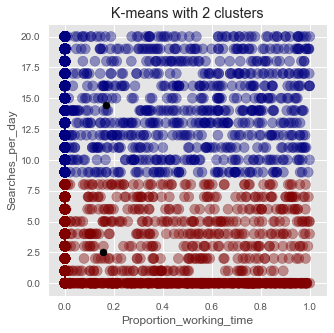

In [38]:
f, ax = plt.subplots(figsize=(5,5))
plt.scatter( X['Proportion_working_time'],X['Searches_per_day'],s=100,c=cluster_labels,cmap="jet",alpha=0.4)
plt.scatter(*zip(*kmeans.cluster_centers_),c="k")
plt.xlabel("Proportion_working_time")
plt.ylabel("Searches_per_day")
plt.title("K-means with 2 clusters")
plt.show()

In [39]:
y = df['Premium_upgrade']

In [40]:
labels = cluster_labels.tolist()

In [41]:
new_labels = []
for x in labels:
    if x ==1:
        new_labels.append(0)
    else:
        new_labels.append(1)

In [42]:
new_labels_series = pd.DataFrame( (v for v in new_labels) )

In [43]:
df['cluster_labels'] = new_labels_series

In [44]:
# XGBoost

In [45]:
import xgboost

/Users/luis/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
from xgboost import XGBClassifier

In [47]:
clf_xgb = XGBClassifier()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

In [50]:
X.shape

(4985, 2)

In [51]:
y.shape

(4985,)

In [52]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [54]:
accuracy_score(clf_xgb.predict(X_test),y_test)

0.93822703569995991

In [55]:
np.mean(cross_val_score(clf_xgb,X_test,y_test,cv=50))*100

93.955310124049618

In [56]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import confusion_matrix

In [57]:
precision_score(clf_xgb.predict(X_test),y_test)

0.66542750929368033

In [58]:
recall_score(clf_xgb.predict(X_test),y_test)

0.73662551440329216

In [59]:
dfmat = confusion_matrix(y_test,clf_xgb.predict(X_test))

In [60]:
dfmat

array([[2160,   64],
       [  90,  179]])

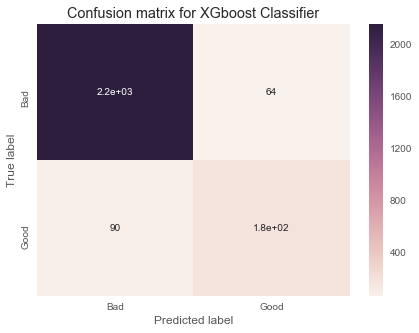

In [61]:
import seaborn as sns
plt.figure(figsize=(7,5))
dfmat = pd.DataFrame(dfmat,index = ["Bad","Good"],
                  columns = ["Bad","Good"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for XGboost Classifier')
plt.show()

0.965192386892


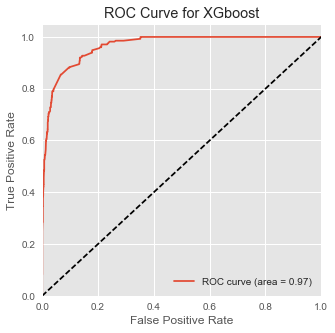

In [62]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf_xgb.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGboost')
plt.legend(loc="lower right")
plt.show()

In [63]:
feat_imp = clf_xgb.feature_importances_.tolist()

In [64]:
feats = X.columns.tolist()

In [65]:
feature_importances = []
for i in range(len(feats)):
    importance = feat_imp[i]
    feature = feats[i]
    feature_importances.append((feature,importance))

In [66]:
# sorting 
sorted_feature_importances = sorted(feature_importances, key=lambda x: -x[1])

In [67]:
# putting the list in dataframe format
df_feature_importances = pd.DataFrame(sorted_feature_importances,columns=["feature","importance"])

In [68]:
df_feature_importances = df_feature_importances.sort_values(by='importance',ascending=True)

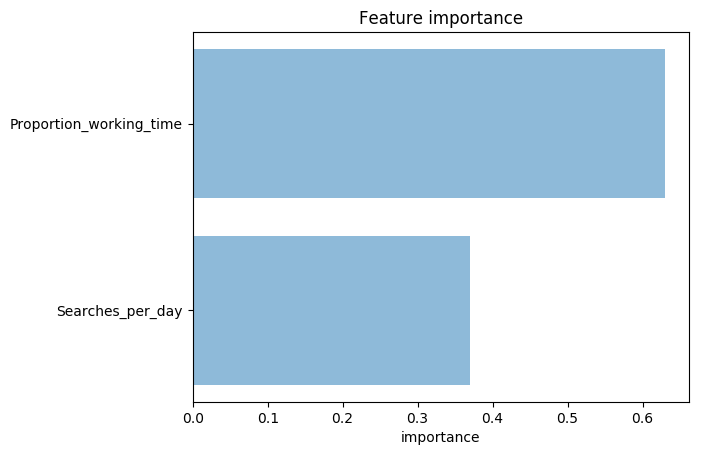

In [69]:
plt.rcdefaults()
fig, ax = plt.subplots()

features = tuple(df_feature_importances.feature.tolist())
y_pos = np.arange(len(features))
performance = np.array(df_feature_importances.importance)
error = np.random.rand(len(features))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, features)
plt.xlabel('importance')
plt.title('Feature importance')
 
plt.show()

In [70]:
df_feature_importances.sort_values(by='importance',ascending=False)

,feature,importance
0,Proportion_working_time,0.630115
1,Searches_per_day,0.369885


In [71]:
# Logistic regression classifier

In [72]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

In [73]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
accuracy_score(clf_lr.predict(X_test),y_test)

0.95066185318892904

In [75]:
np.mean(cross_val_score(clf_lr,X,y,cv=50))*100

94.7258214801072

In [76]:
precision_score(clf_lr.predict(X_test),y_test)

0.66666666666666663

In [77]:
recall_score(clf_lr.predict(X_test),y_test)

0.85581395348837208

(array([  2.,   2.,   2.,   7.,   4.,  17.,   7.,   6.,   2.,   1.]),
 array([ 0.9  ,  0.909,  0.918,  0.927,  0.936,  0.945,  0.954,  0.963,
         0.972,  0.981,  0.99 ]),
 <a list of 10 Patch objects>)

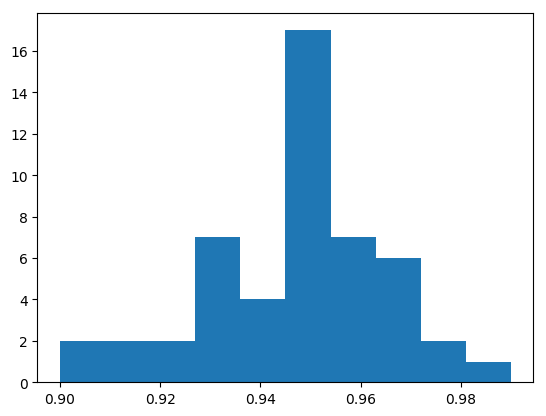

In [78]:
plt.hist(cross_val_score(clf_lr,X,y,cv=50))

In [79]:
dfmat = confusion_matrix(y_test,clf_lr.predict(X_test))

In [80]:
dfmat

array([[2186,   31],
       [  92,  184]])

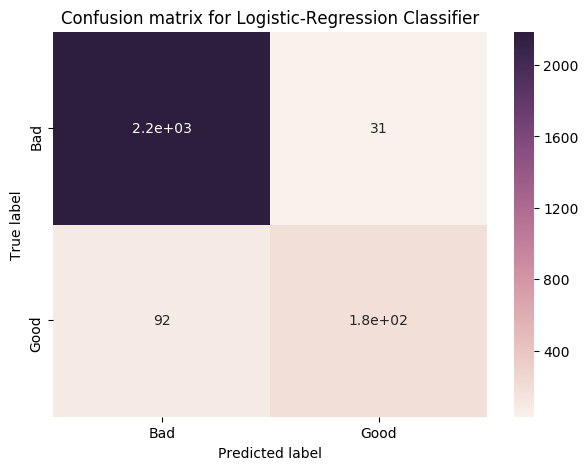

In [81]:
plt.figure(figsize=(7,5))
dfmat = pd.DataFrame(dfmat,index = ["Bad","Good"],
                  columns = ["Bad","Good"])
sns.heatmap(dfmat,annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for Logistic-Regression Classifier')
plt.show()

0.971687811095


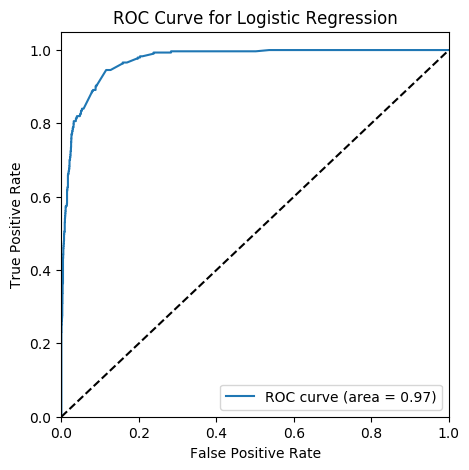

In [82]:
# we check the performance of the algorithm using the area below the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)
clf_lr.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

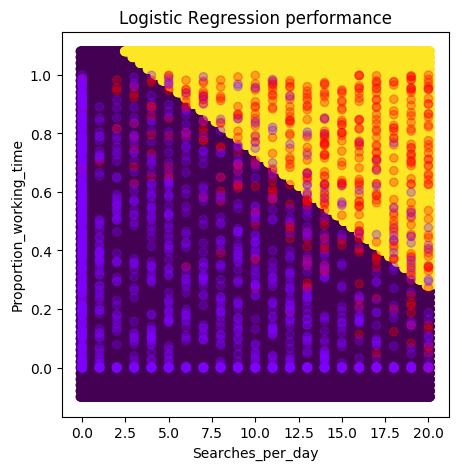

In [83]:
# comparing the prediction of the algorithm with the actual data in a grid
h = .02
x_min, x_max = X.values[:, 1].min() - 0.1, X.values[:, 1].max() + .1
y_min, y_max = X.values[:, 0].min() - .1, X.values[:, 0].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_lr.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5,5))
plt.scatter(xx, yy,c=Z)
plt.scatter(X.values[:,1],X.values[:,0],c=y,cmap="rainbow",alpha=0.3)
plt.xlabel('Searches_per_day')
plt.ylabel('Proportion_working_time')
plt.title('Logistic Regression performance')
plt.show()

In [84]:
predicted = clf_lr.predict(X).tolist()

In [85]:
cluster_class = []
for i in range(len(predicted)):
    pi = predicted[i]
    ni = new_labels[i]
    if pi==ni:
        cluster_class.append(True)
    else: 
        cluster_class.append(False)

In [86]:
cluster_class.count(False)

1959

# Model with all predicting variables

In [87]:
# kmeans clustering 

In [88]:
X_full = df.drop(['User_id','cluster_labels','level_of_use','Premium_upgrade'],axis=1)

In [89]:
kmeans.fit(np.array(X_full))

array_centroids = kmeans.cluster_centers_

# we now calculate our metric for estimating the most appropriate number of clusters
dists=[]
for k in range(1,11): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np.array(X_full))
    array_centroids = kmeans.cluster_centers_
    dist_to_centroid = kmeans_metric(X_full)
    dists.append(dist_to_centroid)

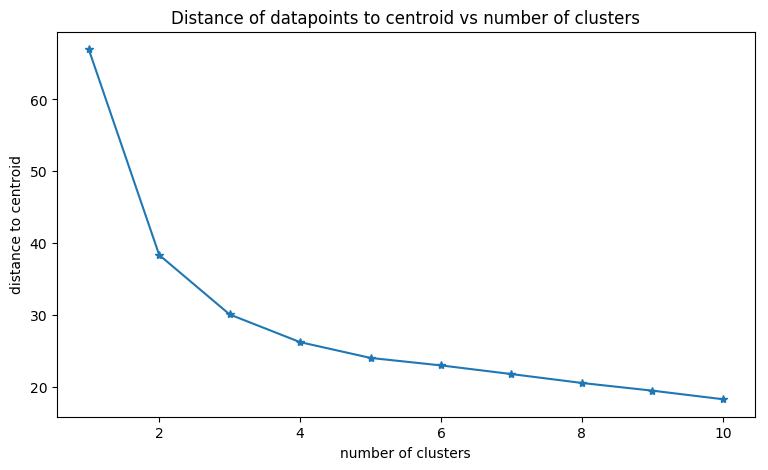

In [90]:
plt.figure(figsize=(9,5))
plt.plot(range(1,11), dists, '-*')
plt.xlabel("number of clusters")
plt.ylabel("distance to centroid")
plt.title("Distance of datapoints to centroid vs number of clusters")
plt.show()

In [91]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(np.array(X_full))
cluster_labels = kmeans.fit_predict(np.array(X_full))

In [92]:
#XGboost

In [93]:
X_train, X_test,y_train,y_test = train_test_split(X_full,y,test_size = 0.5,random_state = 42)

In [94]:
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [95]:
accuracy_score(clf_xgb.predict(X_test),y_test)

0.97392699558764539

In [96]:
np.mean(cross_val_score(clf_xgb,X_test,y_test,cv=50))*100

97.321392557022804

In [97]:
precision_score(clf_xgb.predict(X_test),y_test)

0.81040892193308545

In [98]:
recall_score(clf_xgb.predict(X_test),y_test)

0.93965517241379315

In [99]:
dfmat = confusion_matrix(y_test,clf_xgb.predict(X_test))

In [100]:
dfmat

array([[2210,   14],
       [  51,  218]])

0.992605468597


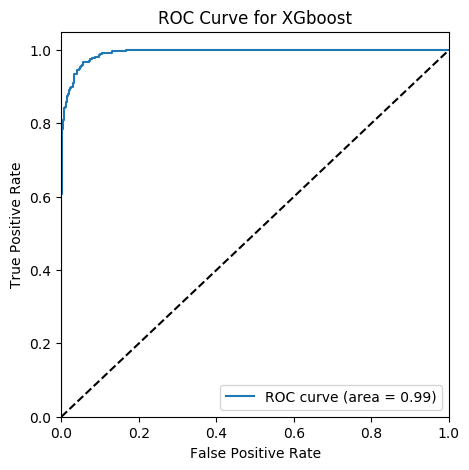

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=.5)
clf_xgb.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGboost')
plt.legend(loc="lower right")
plt.show()

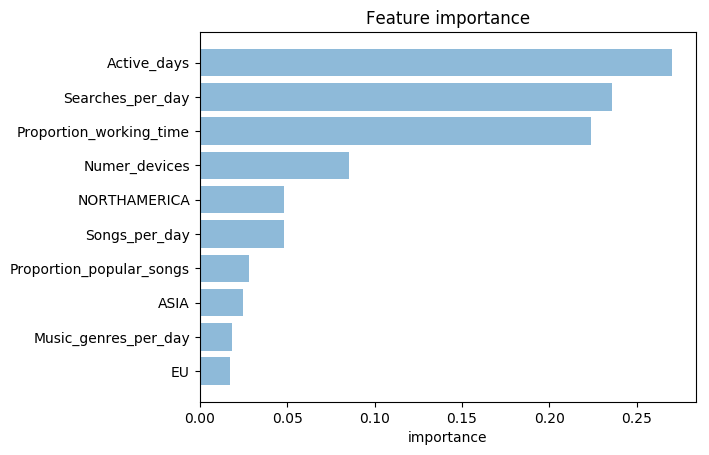

In [102]:
feat_imp = clf_xgb.feature_importances_.tolist()

feats = X_full.columns.tolist()

feature_importances = []
for i in range(len(feats)):
    importance = feat_imp[i]
    feature = feats[i]
    feature_importances.append((feature,importance))
    
# sorting 
sorted_feature_importances = sorted(feature_importances, key=lambda x: -x[1])

# putting the list in dataframe format
df_feature_importances = pd.DataFrame(sorted_feature_importances,columns=["feature","importance"])

df_feature_importances = df_feature_importances.sort_values(by='importance',ascending=True)

plt.rcdefaults()
fig, ax = plt.subplots()

features = tuple(df_feature_importances.feature.tolist())
y_pos = np.arange(len(features))
performance = np.array(df_feature_importances.importance)
error = np.random.rand(len(features))

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, features)
plt.xlabel('importance')
plt.title('Feature importance')
 
plt.show()

In [103]:
df_feature_importances

,feature,importance
9,EU,0.017081
8,Music_genres_per_day,0.018634
7,ASIA,0.024845
6,Proportion_popular_songs,0.027950
4,Songs_per_day,0.048137
5,NORTHAMERICA,0.048137
3,Numer_devices,0.085404
2,Proportion_working_time,0.223602
1,Searches_per_day,0.236025
0,Active_days,0.270186


In [104]:
# Logistic Regression classifier

In [105]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
accuracy_score(clf_lr.predict(X_test),y_test)

0.95748094665062178

In [107]:
clf_lr.predict_proba(X_train)[:,0].shape

(2492,)

In [108]:
clf_lr.predict(X_train).shape

(2492,)

In [109]:
np.mean(cross_val_score(clf_lr,X_test,y_test,cv=50))*100

96.190092036814747

In [110]:
precision_score(clf_lr.predict(X_test),y_test)

0.70036101083032487

In [111]:
recall_score(clf_lr.predict(X_test),y_test)

0.89400921658986177

In [112]:
dfmat = confusion_matrix(y_test,clf_lr.predict(X_test))
dfmat

array([[2193,   23],
       [  83,  194]])

0.991199746755


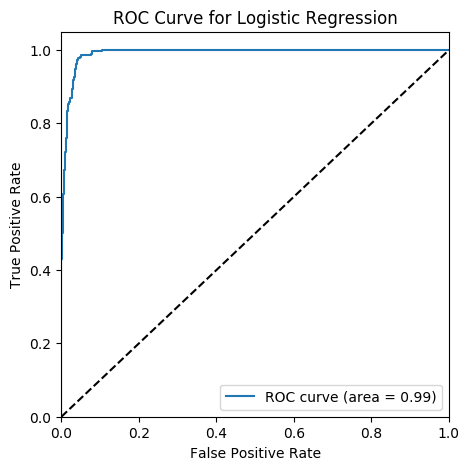

In [113]:
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=.5)
clf_lr.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, clf_lr.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [114]:
df_np = df[df.Premium_upgrade == 0]

In [115]:
df_np.head()

,User_id,Active_days,Songs_per_day,Music_genres_per_day,Numer_devices,Proportion_working_time,Searches_per_day,Proportion_popular_songs,NORTHAMERICA,EU,ASIA,Premium_upgrade,level_of_use,cluster_labels
0,1,267,28,3,5,0.000000,0,0.028075,1,0,0,0,low,0.0
1,2,242,30,4,2,0.000000,0,0.024687,1,0,0,0,low,0.0
3,4,88,10,1,1,0.000000,2,0.017256,0,0,1,0,low,0.0
5,6,49,46,3,2,0.455561,14,0.005056,0,0,1,0,high,1.0
7,8,108,56,3,2,0.000000,9,0.009088,0,0,1,0,medium,0.0


In [116]:
clf_lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)